# Problem Statement:

Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Description :

Undergrad : person is under graduated or not
Marital.Status : marital status of a person
Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 
Work Experience : Work experience of an individual person
Urban : Whether that person belongs to urban area or not

In [1]:
# importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading data
df = pd.read_csv("Fraud_check.csv")

# Data Exploration

In [3]:
df.shape

(600, 6)

In [4]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [5]:
df.tail()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO
599,NO,Divorced,96519,158137,16,NO


In [6]:
df.sample(5)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
447,NO,Married,83061,166606,5,YES
105,NO,Single,55873,46893,15,NO
99,NO,Married,52495,114350,12,NO
200,YES,Single,61906,162777,17,YES
278,NO,Married,25062,114823,11,NO


### Quick Data Check

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.3+ KB


### Statistical Summary

In [8]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [9]:
df.nunique()

Undergrad            2
Marital.Status       3
Taxable.Income     599
City.Population    598
Work.Experience     31
Urban                2
dtype: int64

# Data Preprocessing

### Identifying Duplicates

In [10]:
df.duplicated().sum()

0

- There is no duplicate values present in dataset.

### Identifying Missing Values

In [11]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

- There is no missing values in dataset.

### Identifying Outliers

<Axes: >

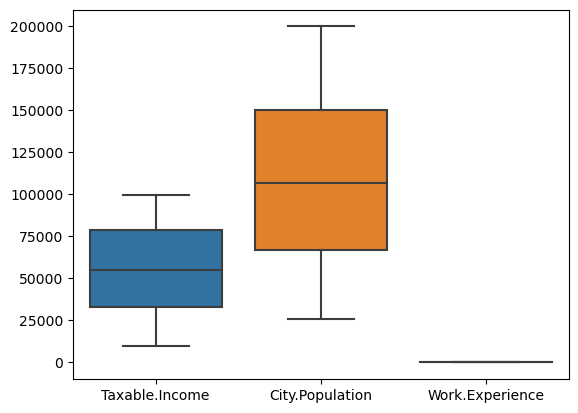

In [12]:
sns.boxplot(data=df)

- With above boxplot we can see there is no outlier present in dataset.

# Making Target Column
-- as per constraint:

-- taxable_income <= 30000 as "Risky" and others are "Good"

In [13]:
def Tagging(income):
    if income <= 30000:
        return "Risky"
    else:
        return "Good"

In [14]:
df['Target'] = df['Taxable.Income'].apply(Tagging)

In [15]:
df['Target'].value_counts()

Good     476
Risky    124
Name: Target, dtype: int64

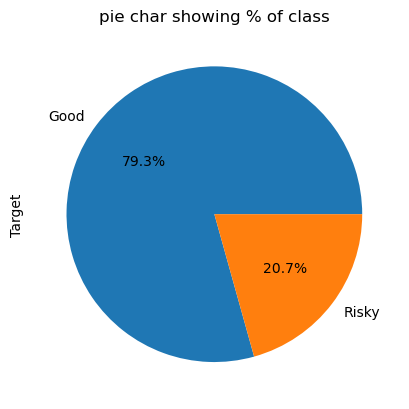

In [16]:
df['Target'].value_counts().plot(kind="pie",autopct="%1.1f%%")
plt.title('pie char showing % of class')
plt.show()

In [17]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Target
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


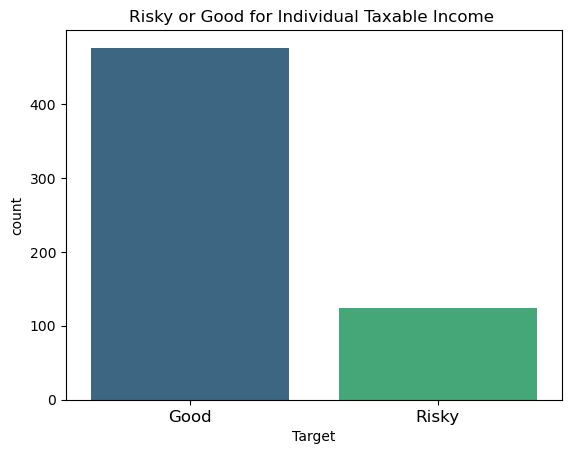

In [18]:
sns.countplot(x='Target', data=df, palette = 'viridis', order=df['Target'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Risky or Good for Individual Taxable Income ')
plt.show()

- Imbalanced data refers to those types of datasets where the target class has an uneven distribution of observations, 
- i.e one class label has a very high number of observations and the other has a very low number of observations.

- Here, the class “Good” is called the majority class, and the much smaller in size “Risky” class is called the minority class.

In [19]:
data = df.copy()
data.rename(columns={'Marital.Status':'Marital_Status', 'Taxable.Income':'Taxable_Income','Work.Experience':'Work_Experience','City.Population':'City_Population'}, inplace = True)
data.drop('Taxable_Income', axis=1, inplace = True)
categorical_features = data.describe(include=["object",'category']).columns
categorical_features

Index(['Undergrad', 'Marital_Status', 'Urban', 'Target'], dtype='object')

### Data Encoding

In [20]:
#Creating dummy vairables of the categorical features
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in categorical_features:
        le.fit(data[col])
        data[col] = le.transform(data[col])
data.head()

,Undergrad,Marital_Status,City_Population,Work_Experience,Urban,Target
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0


In [21]:
data.Target.value_counts()

0    476
1    124
Name: Target, dtype: int64

# Data Visualization

[]

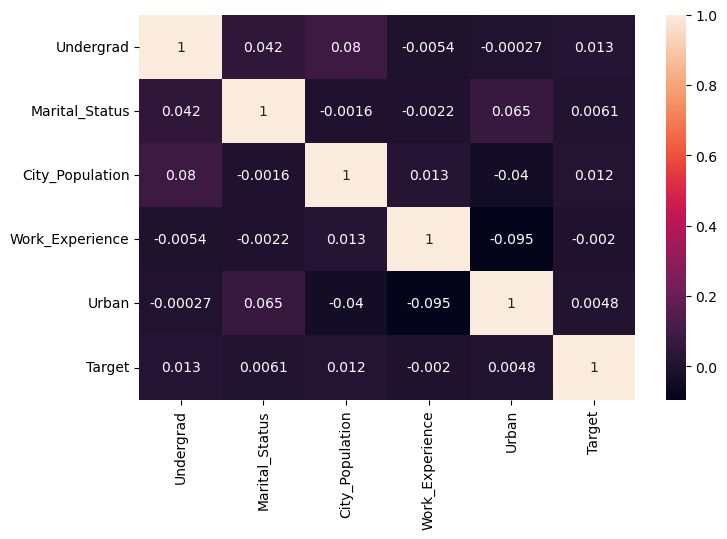

In [22]:
plt.figure(figsize=(8,5))
sns.heatmap(data.corr(),annot=True)
plt.plot()

C:\Users\vijay\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


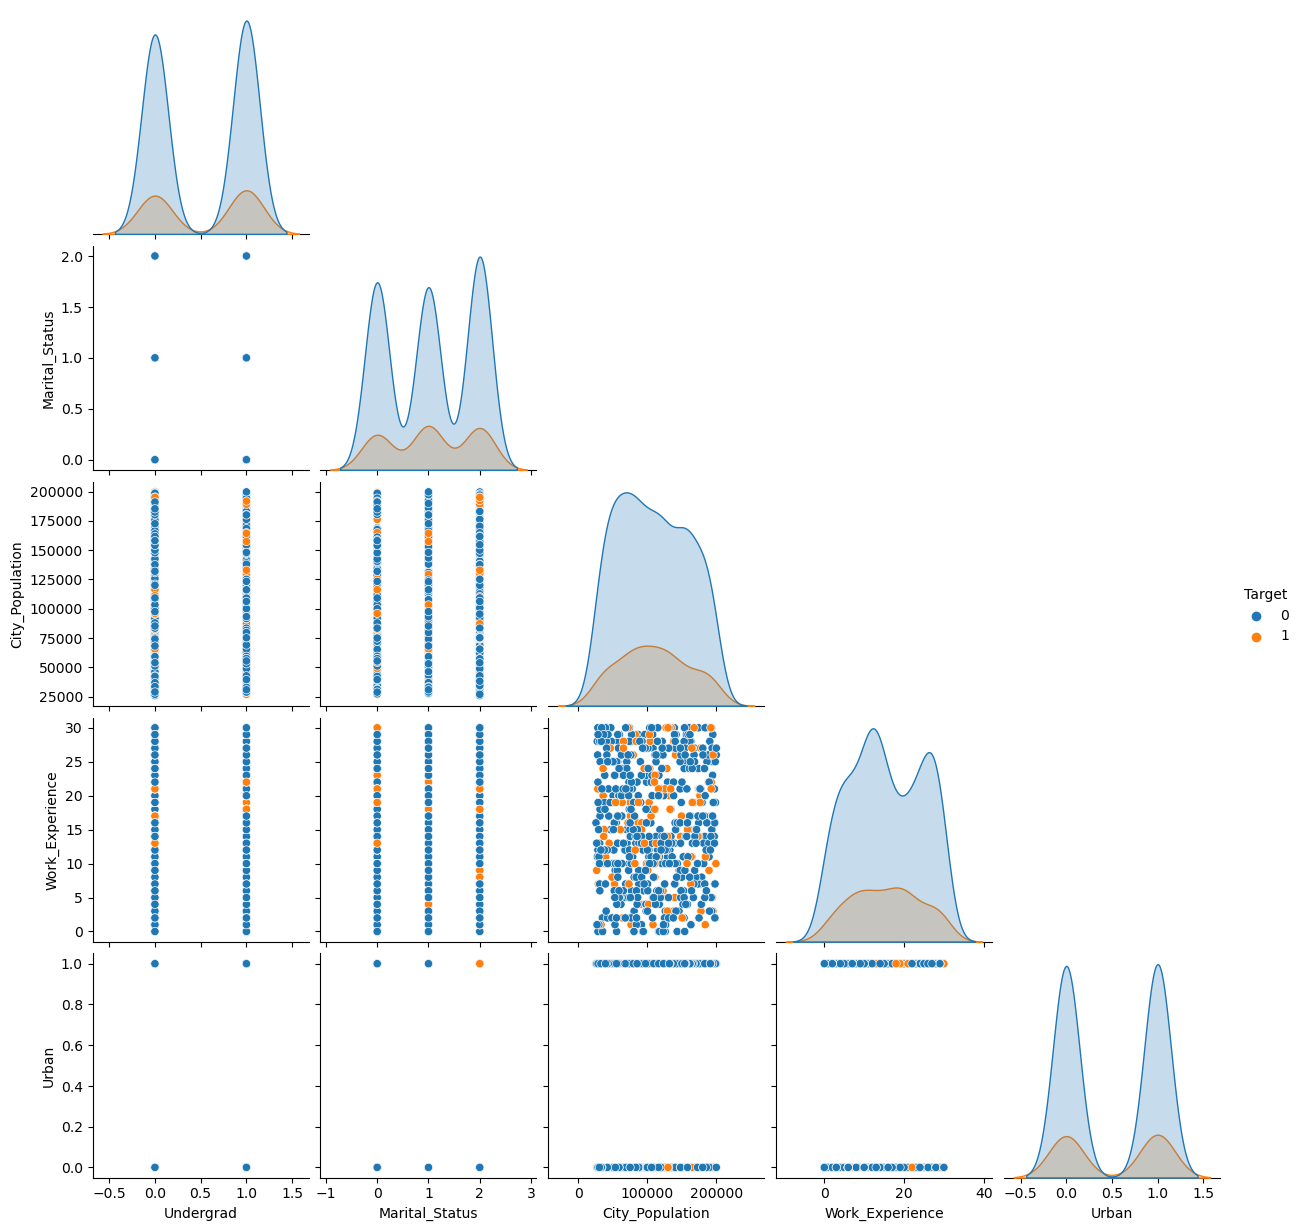

In [23]:
sns.pairplot(data,hue='Target',corner=True);

# Data Splitting

In [24]:
X = data.drop('Target', axis=1)
y = data['Target']

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test:",y_test.shape)

Shape of X_train:  (420, 5)
Shape of X_test:  (180, 5)
Shape of y_train:  (420,)
Shape of y_test: (180,)


In [27]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

# Model Selection

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
model = DecisionTreeClassifier()

In [30]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [31]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1])

# Model Evaluation

In [32]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, make_scorer, ConfusionMatrixDisplay

In [33]:
accuracy_score(y_test, y_pred)

0.6444444444444445

In [34]:
confusion_matrix(y_test, y_pred)

array([[107,  36],
       [ 28,   9]], dtype=int64)

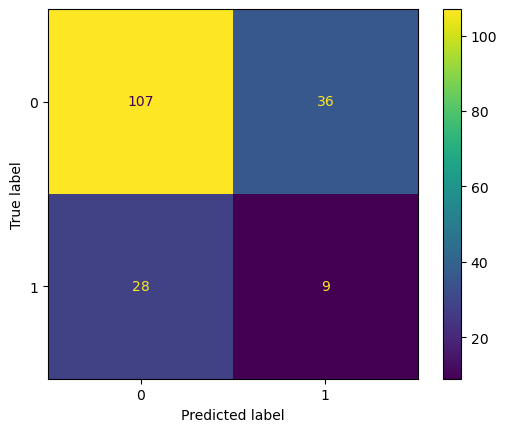

In [35]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=model.classes_).plot();

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.75      0.77       143
           1       0.20      0.24      0.22        37

    accuracy                           0.64       180
   macro avg       0.50      0.50      0.49       180
weighted avg       0.67      0.64      0.66       180



In [37]:
model.feature_importances_

array([0.05715792, 0.04878527, 0.63777025, 0.23203619, 0.02425038])

In [38]:
X.columns

Index(['Undergrad', 'Marital_Status', 'City_Population', 'Work_Experience',
       'Urban'],
      dtype='object')

In [39]:
pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['Feature Importance'])

,Feature Importance
Undergrad,0.057158
Marital_Status,0.048785
City_Population,0.637770
Work_Experience,0.232036
Urban,0.024250


In [40]:
pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['Feature Importance']).sort_values('Feature Importance')

,Feature Importance
Urban,0.024250
Marital_Status,0.048785
Undergrad,0.057158
Work_Experience,0.232036
City_Population,0.637770


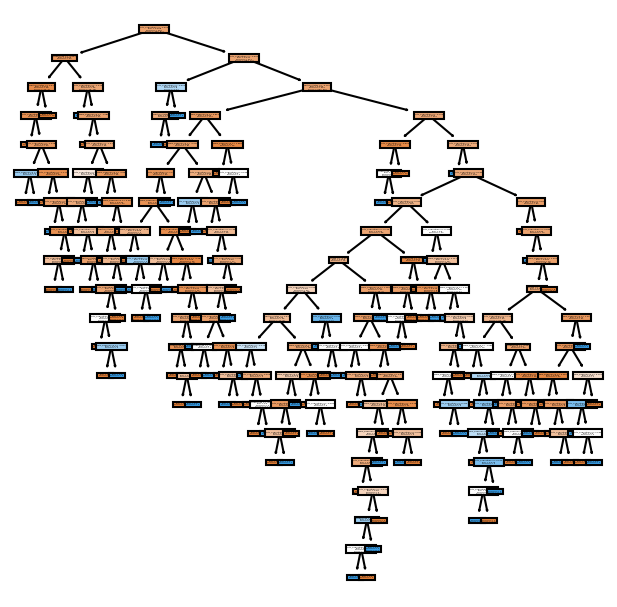

In [41]:
from sklearn.tree import plot_tree

plt.figure(figsize=(5,5),dpi=150)
plot_tree(model,filled=True,feature_names=X.columns);

# Handling Imbalance Dataset - SMOTE

In [42]:
from collections import Counter
from imblearn.over_sampling import SMOTE

In [43]:
counter = Counter(y_train)
print('Before', counter)
# oversampling the train dataset using SMOTE
smt = SMOTE()
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

counter = Counter(y_train_sm)
print('After', counter)

Before Counter({0: 333, 1: 87})
After Counter({0: 333, 1: 333})


## Hyper Parameter Tunning

In [44]:
def report_model(model):
    """
    Generates and prints various reports to evaluate a trained model.
    Args:
        model: The trained model object.
    """

    # Make predictions on the test set
    model_preds = model.predict(X_test)

    # Calculate accuracy scores on training and test sets
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    # Print training and test accuracy scores
    print(f"Training Accuracy: {train_score:.4f}")
    print(f"Test Accuracy: {test_score:.4f}")
    print()

    # Generate and print confusion matrix with annotations
    print("Confusion Matrix:")
    print(sns.heatmap(confusion_matrix(y_test, model_preds), annot=True))

    # Generate and print classification report
    print("Classification Report:")
    print(classification_report(y_test, model_preds))
    print()

    # Create a figure for plotting the decision tree
    plt.figure(figsize=(12, 8), dpi=150)

    # Plot the decision tree with filled nodes and feature names
    plot_tree(model, filled=True, feature_names=X.columns.tolist());

- The min_samples_split parameter will evaluate the number of samples in the node, and if the number is less than the minimum the split will be avoided and the node will be a leaf.

- The min_samples_leaf parameter checks before the node is generated, that is, if the possible split results in a child with fewer samples, the split will be avoided (since the minimum number of samples for the child to be a leaf has not been reached) and the node will be replaced by a leaf.

- max_features : int, float or {"auto", "sqrt", "log2"}, default=None The number of features to consider when looking for the best split

Training Accuracy: 0.7810
Test Accuracy: 0.7333

Confusion Matrix:
Axes(0.125,0.11;0.62x0.77)
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.92      0.85       143
           1       0.00      0.00      0.00        37

    accuracy                           0.73       180
   macro avg       0.39      0.46      0.42       180
weighted avg       0.62      0.73      0.67       180




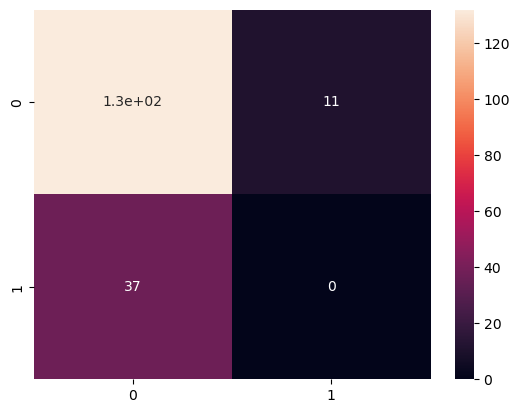

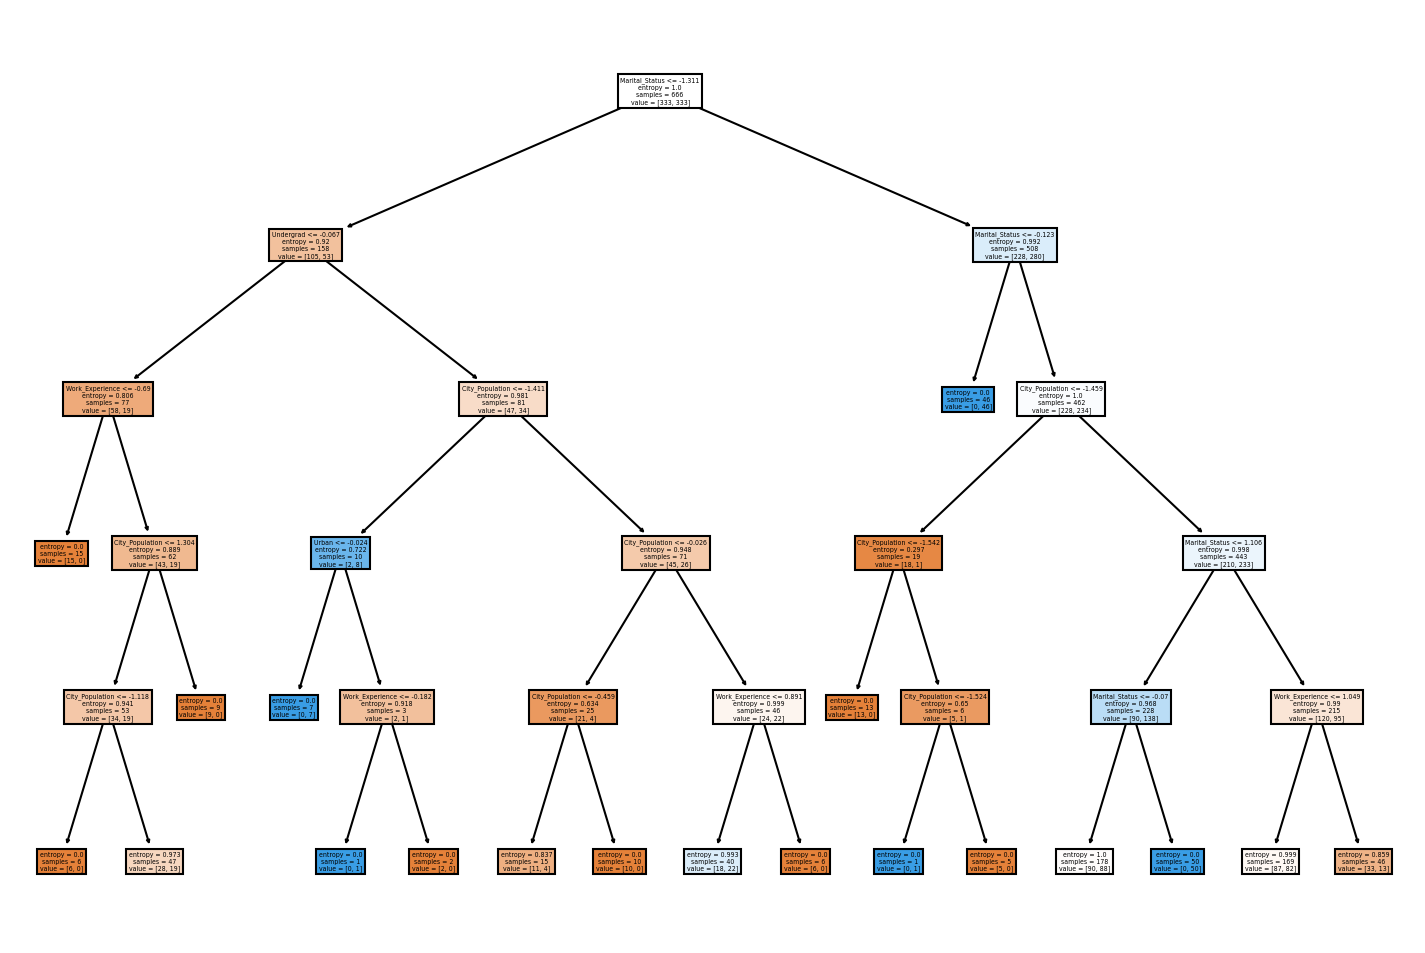

In [45]:
pruned_tree = DecisionTreeClassifier(criterion="entropy",max_depth=5)
pruned_tree.fit(X_train_sm, y_train_sm)
report_model(pruned_tree)

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
dtc = DecisionTreeClassifier()
scorer = make_scorer(accuracy_score)

param_grid = {'criterion' : ["gini", "entropy"] ,
              'max_depth': [5,6,7,8,9,10],
              'min_samples_split': [2, 5],
              'min_samples_leaf': [1, 2,3]}

grid=GridSearchCV(dtc,param_grid,scoring=scorer,cv=10,n_jobs=-1,verbose=3)

In [48]:
grid.fit(X_train_sm, y_train_sm)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 5]},
             scoring=make_scorer(accuracy_score), verbose=3)

In [49]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=10)

Training Accuracy: 0.8595
Test Accuracy: 0.5778

Confusion Matrix:
Axes(0.125,0.11;0.62x0.77)
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.66      0.71       143
           1       0.16      0.24      0.19        37

    accuracy                           0.58       180
   macro avg       0.47      0.45      0.45       180
weighted avg       0.65      0.58      0.61       180




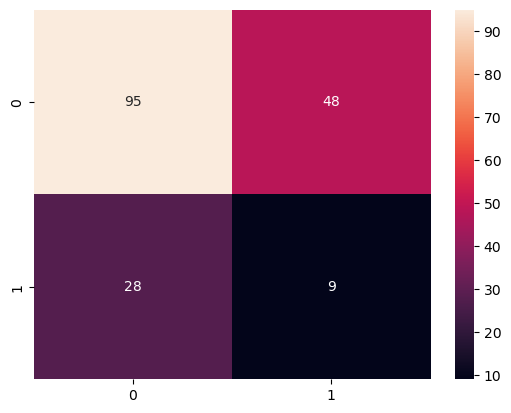

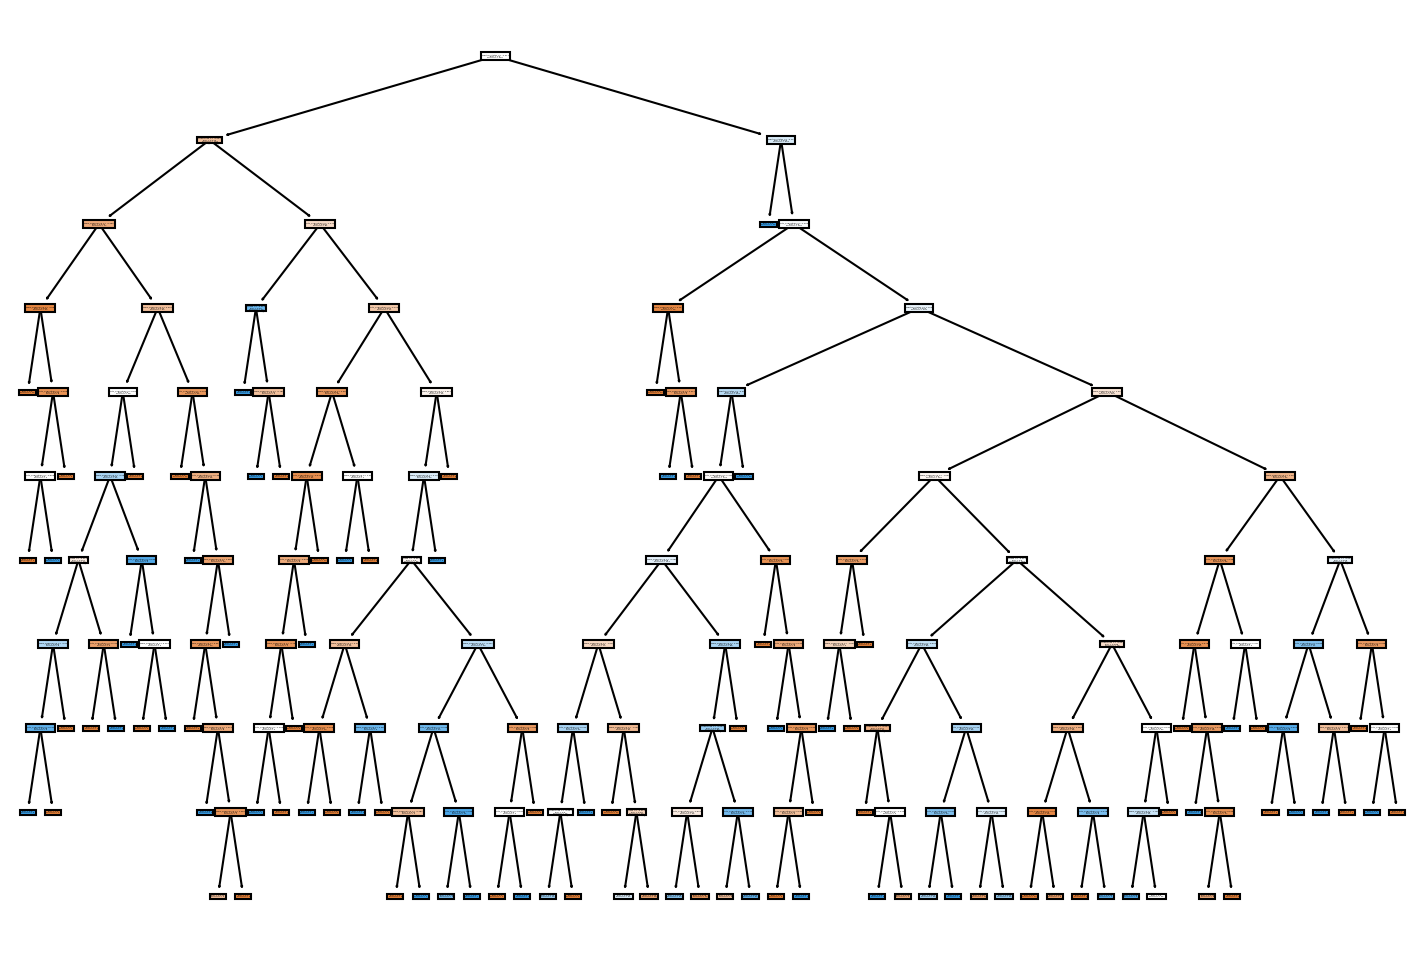

In [50]:
report_model(grid.best_estimator_)

In [51]:
dtc = DecisionTreeClassifier()
scorer = make_scorer(accuracy_score)

param_grid = {'criterion' : ["gini", "entropy"],
              'max_leaf_nodes': [5,6,7,8,9,10],
              'min_samples_split': [2, 5]}

grid = GridSearchCV(dtc, param_grid, scoring=scorer, cv=5, n_jobs=-1, verbose=3)

In [52]:
grid.fit(X_train_sm, y_train_sm)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_leaf_nodes': [5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 5]},
             scoring=make_scorer(accuracy_score), verbose=3)

In [53]:
grid.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=10)

Training Accuracy: 0.7881
Test Accuracy: 0.7556

Confusion Matrix:
Axes(0.125,0.11;0.62x0.77)
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.94      0.86       143
           1       0.18      0.05      0.08        37

    accuracy                           0.76       180
   macro avg       0.49      0.50      0.47       180
weighted avg       0.67      0.76      0.70       180




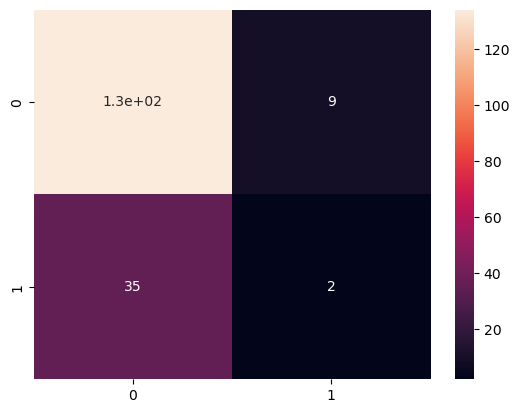

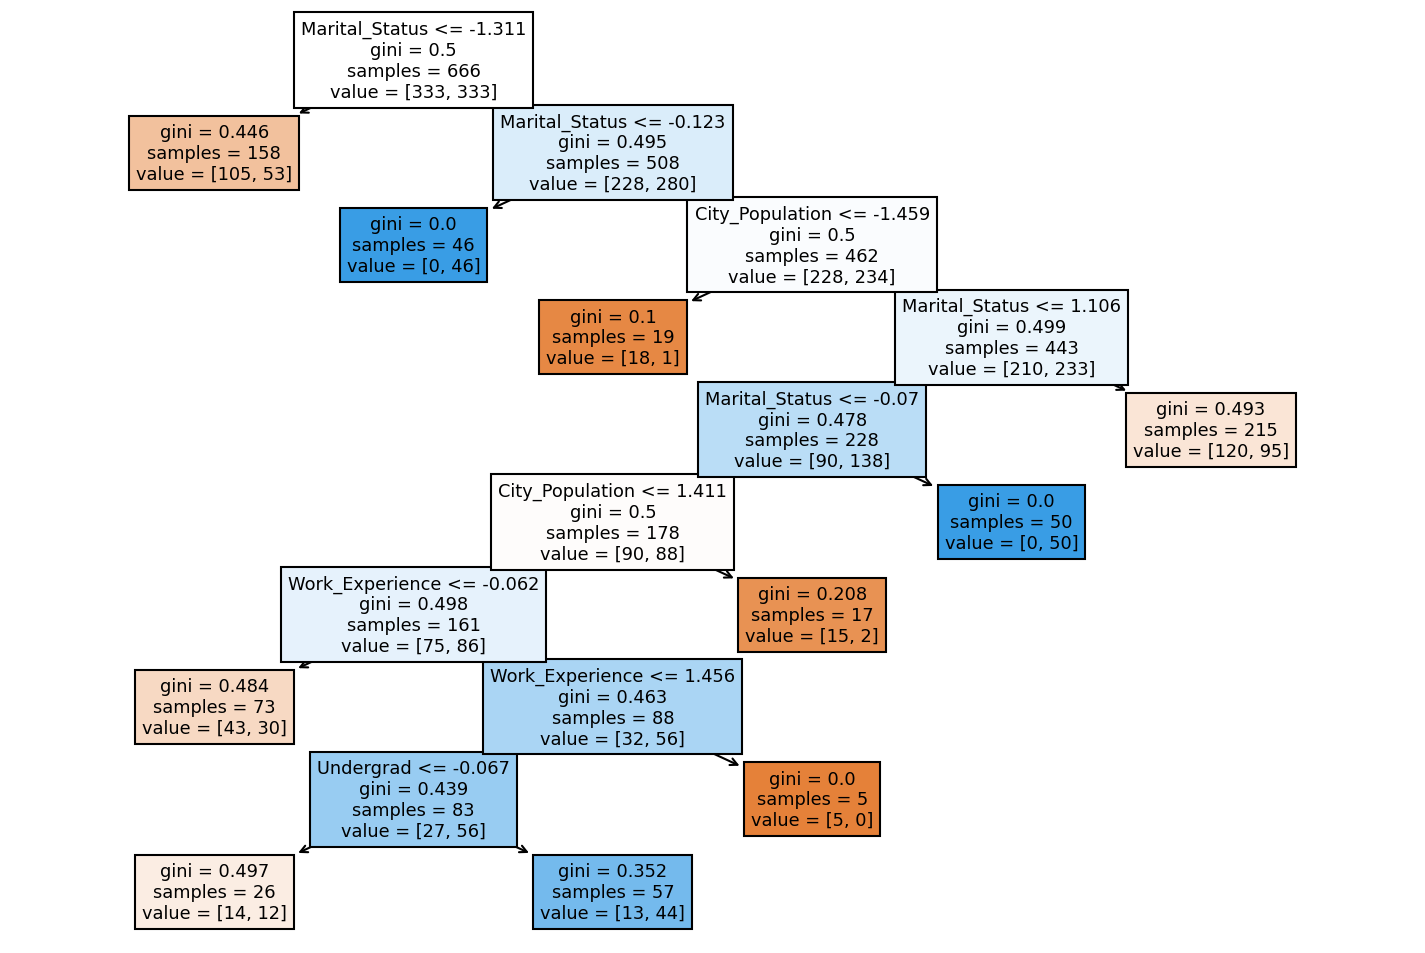

In [54]:
report_model(grid.best_estimator_)

# Model Deployment

In [55]:
# from joblib import dump,load

In [56]:
# dump(final_model, 'dtregmodel.joblib')